In [1]:
from ML.EFPs.data_loaders import load_data_top_tagging
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import joblib
import utilities.utilities as utilities

#### Loading the Dataset

In [2]:
root_data_folder = "../../../Data"
X_train, y_train = load_data_top_tagging(
    quark_data_path=f"{root_data_folder}/Trainning/q_jets_efps_d5_primed.npy", 
    gluon_data_path=f"{root_data_folder}/Trainning/g_jets_efps_d5_primed.npy",
    top_data_path=f"{root_data_folder}/Trainning/t_jets_efps_d5_primed.npy"
)
X_val, y_val = load_data_top_tagging(
    quark_data_path=f"{root_data_folder}/Validation/q_jets_efps_d5_primed.npy", 
    gluon_data_path=f"{root_data_folder}/Validation/g_jets_efps_d5_primed.npy",
    top_data_path=f"{root_data_folder}/Validation/t_jets_efps_d5_primed.npy"
)
best_features_set = [0, 1, 3, 9, 11, 12, 15, 16, 18, 22, 28, 29, 34, 38, 39, 44, 45, 48]

In [3]:
len(best_features_set)

18

#### Trainning the Boosted DT

In [7]:
# as a base estimator we use the decision tree for the quark-gluon tagging
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=300)
boosted_dt = AdaBoostClassifier(estimator=tree, learning_rate=0.5)
# trainning using only the best feature set
boosted_dt.fit(X_train[:, best_features_set], y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=5,
                                                    min_samples_split=300),
                   learning_rate=0.5)

#### Some quick checks

In [8]:
y_val_predict = boosted_dt.predict(X_val[:, best_features_set])
utilities.display_metrics(y_val, y_val_predict)

Recall: 0.9030
Precision: 0.8736
Confusion Matrix:
[[19219  2963]
 [ 2201 20487]]


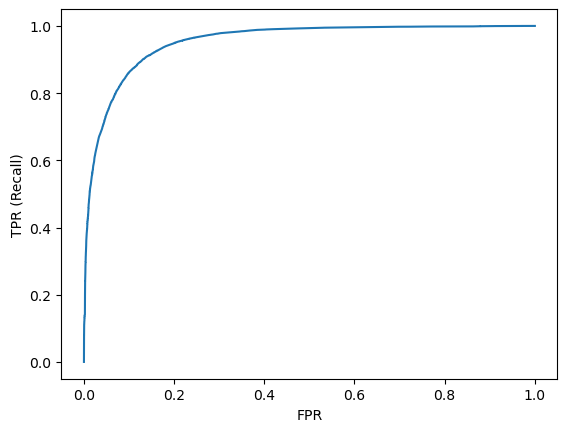

AUC: 0.9530


In [15]:
# roc curve on the validation set
y_score = boosted_dt.predict_proba(X_val[:, best_features_set])
utilities.display_roc_curve(y_val, y_score[:, 1])

#### Saving the model

In [12]:
with open("Top_Tagging_BoostedDT.joblib", "wb") as fo:
    joblib.dump(boosted_dt, fo)